In [37]:
# import libraries
import numpy as np 
import pandas as pd
import sklearn as sk 
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [38]:
# load the csv file 
data = pd.read_csv("austin_weather.csv")
data

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1314,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,10.0,10.0,10.0,12.0,5.0,21.0,0.00
1315,1315,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,10.0,10.0,10.0,14.0,5.0,20.0,0.00
1316,1316,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,10.0,10.0,10.0,12.0,4.0,17.0,0.00
1317,1317,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,10.0,10.0,10.0,13.0,4.0,20.0,0.00


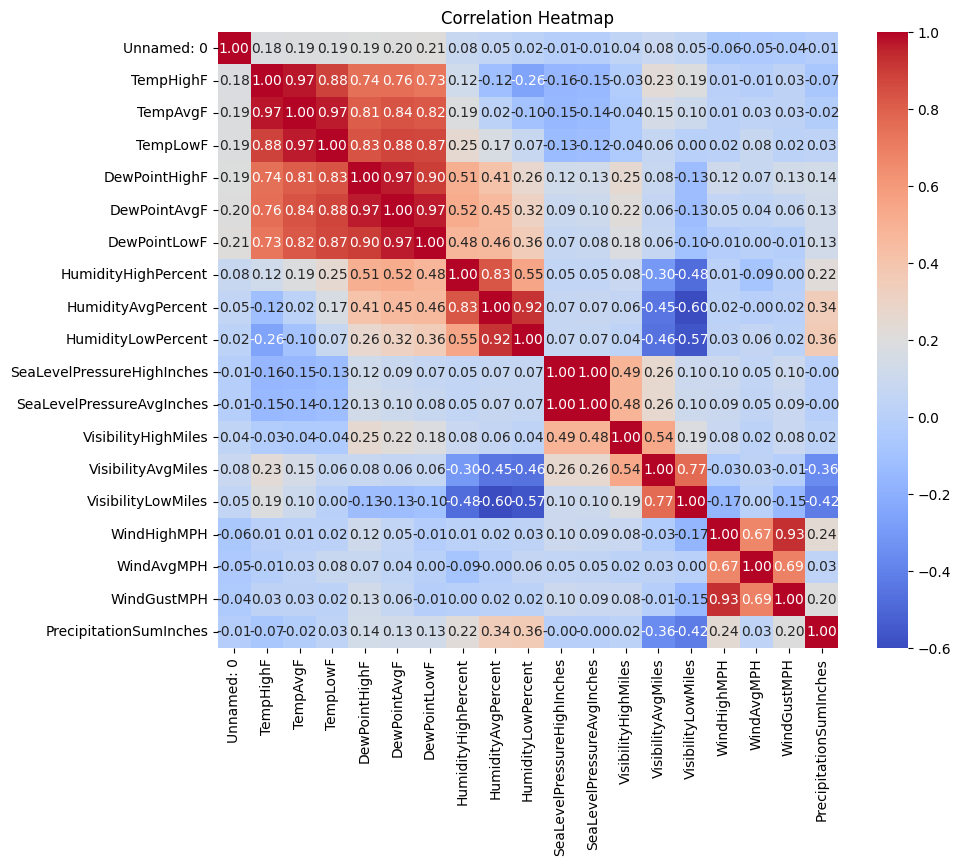

In [46]:
# Correlation heatmap
correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [42]:
# data overview
# display the first few rows
print(data.head())

   Unnamed: 0  TempHighF  TempAvgF  TempLowF  DewPointHighF  DewPointAvgF  \
0           0         74        60        45           67.0          49.0   
1           1         56        48        39           43.0          36.0   
2           2         58        45        32           31.0          27.0   
3           3         61        46        31           36.0          28.0   
4           4         58        50        41           44.0          40.0   

   DewPointLowF  HumidityHighPercent  HumidityAvgPercent  HumidityLowPercent  \
0          43.0                 93.0                75.0                57.0   
1          28.0                 93.0                68.0                43.0   
2          23.0                 76.0                52.0                27.0   
3          21.0                 89.0                56.0                22.0   
4          36.0                 86.0                71.0                56.0   

   SeaLevelPressureHighInches  SeaLevelPressureAvgInches

In [43]:
# display the column 
print(data.columns)

Index(['Unnamed: 0', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches'],
      dtype='object')


In [44]:
# get information about the data types and non-null values
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1319 non-null   int64  
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1319 non-null   int64  
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1319 non-null   float64
 5   DewPointAvgF                1319 non-null   float64
 6   DewPointLowF                1319 non-null   float64
 7   HumidityHighPercent         1319 non-null   float64
 8   HumidityAvgPercent          1319 non-null   float64
 9   HumidityLowPercent          1319 non-null   float64
 10  SeaLevelPressureHighInches  1319 non-null   float64
 11  SeaLevelPressureAvgInches   1319 non-null   float64
 12  VisibilityHighMiles         1319 non-null   float64
 13  VisibilityAvgMiles          1319 

In [4]:
data = data.drop(["Events","Date","SeaLevelPressureLowInches"], axis= 1)

In [5]:
data=data.replace('T',0.0)

In [6]:
data=data.replace('-',0.0)

In [9]:
data.to_csv("austin_weather_final.csv")

In [12]:
data = pd.read_csv("austin_weather_final.csv")
data

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1314,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,10.0,10.0,10.0,12.0,5.0,21.0,0.00
1315,1315,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,10.0,10.0,10.0,14.0,5.0,20.0,0.00
1316,1316,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,10.0,10.0,10.0,12.0,4.0,17.0,0.00
1317,1317,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,10.0,10.0,10.0,13.0,4.0,20.0,0.00


In [13]:
x= data.drop(['PrecipitationSumInches'], axis=1)

In [15]:
y=data["PrecipitationSumInches"]

In [17]:
# reshaping it into 2d vector 
y= y.values.reshape(-1,1)

In [18]:
y

array([[0.46],
       [0.  ],
       [0.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [19]:
day_index=798
days=[i for i in range(y.size)]
days

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [20]:
# intialize the linear regression classifer
clf = LinearRegression()
#train the classifer 
clf.fit(x,y)

LinearRegression()

the precipitation trend graph


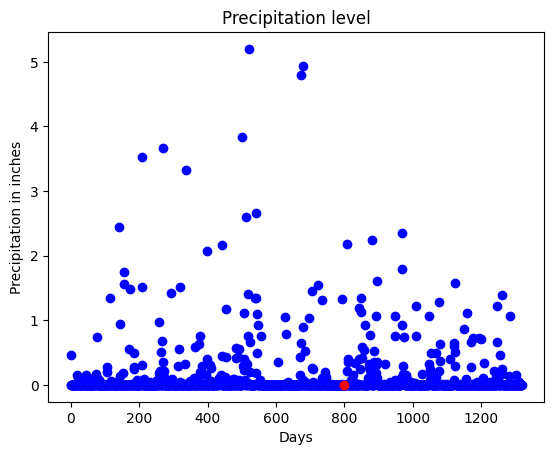

In [35]:
# plot a graph
print("the precipitation trend graph")
plt.scatter(days, y , color='b')
plt.scatter(days[day_index], y[day_index], color='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")

plt.show()
x_vis=x.filter(['TempAvgF','DewPointAvgF','HumidityAvgPercent','SeaLevelPressureAvgInches','VisibilityAvgMiles',"windAvgMPH"])

the precipitation vs attributes trend graph 


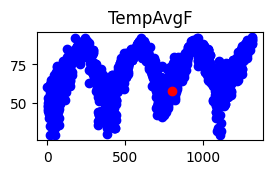

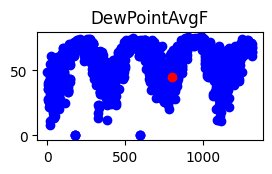

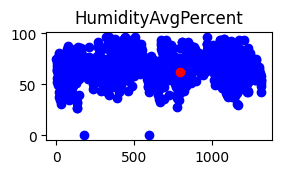

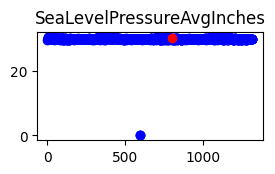

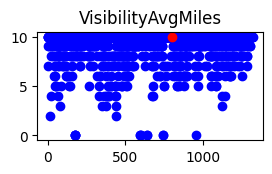

In [47]:
print("the precipitation vs attributes trend graph ")
for i in range(x_vis.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter (days,x_vis[x_vis.columns.values[i][:100]],color='b')
    plt.scatter(days[day_index],x_vis[x_vis.columns.values[i]][day_index],color='r')
    plt.title(x_vis.columns.values[i])
    plt.show()
    